Task 1

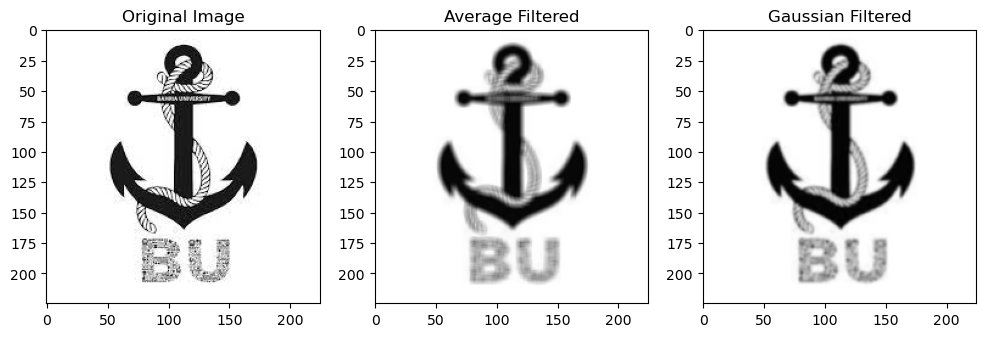

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('bahria.jpeg', cv2.IMREAD_GRAYSCALE)
average_kernel = np.ones((5, 5), np.float32) / 25
average_filtered = cv2.filter2D(image, -1, average_kernel)
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(average_filtered, cmap='gray'), plt.title('Average Filtered')
plt.subplot(1, 3, 3), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian Filtered')
plt.show()


Task 2


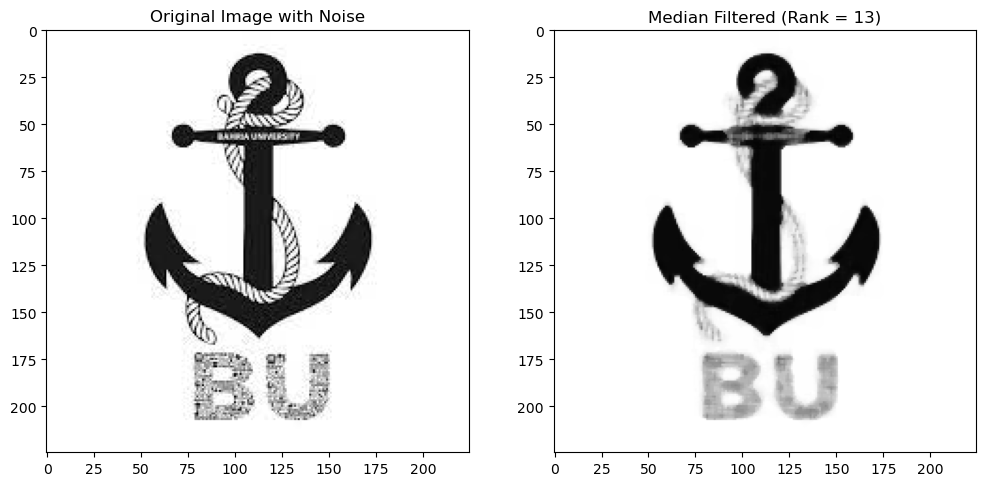

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('bahria.jpeg', cv2.IMREAD_GRAYSCALE)
median_filtered = cv2.medianBlur(image, 5)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image with Noise')
plt.subplot(1, 2, 2), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filtered (Rank = 13)')
plt.show()


Task 3


C:\Users\Hamid\AppData\Local\Temp\ipykernel_19092\3444317745.py:10: RuntimeWarning: overflow encountered in scalar add
  vertical_edges[y, x] = (image[y+1, x] + image[y-1, x] - 2 * image[y, x])
C:\Users\Hamid\AppData\Local\Temp\ipykernel_19092\3444317745.py:13: RuntimeWarning: overflow encountered in scalar add
  horizontal_edges[y, x] = (image[y, x+1] + image[y, x-1] - 2 * image[y, x])


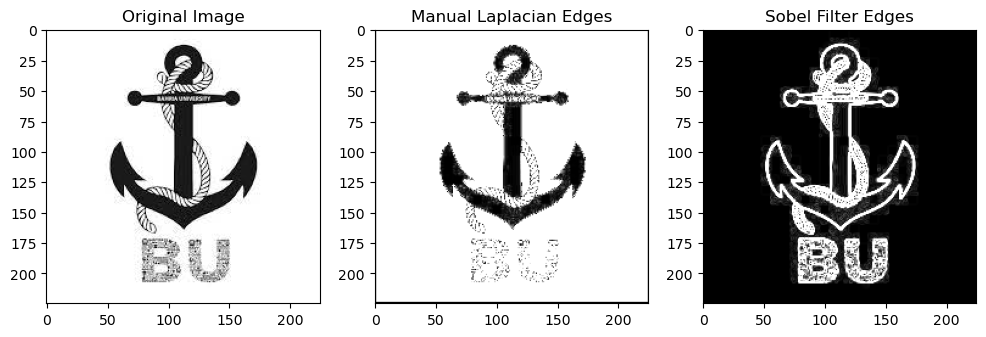

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def mylaplacian(image):
    height, width = image.shape
    vertical_edges = np.zeros_like(image, dtype=np.float32)
    horizontal_edges = np.zeros_like(image, dtype=np.float32)
    for y in range(1, height-1):
        for x in range(1, width-1):
            vertical_edges[y, x] = (image[y+1, x] + image[y-1, x] - 2 * image[y, x])
    for y in range(1, height-1):
        for x in range(1, width-1):
            horizontal_edges[y, x] = (image[y, x+1] + image[y, x-1] - 2 * image[y, x])
    edges = np.sqrt(np.square(vertical_edges) + np.square(horizontal_edges))
    edges = np.clip(edges, 0, 255).astype(np.uint8) 
    return edges
image = cv2.imread('bahria.jpeg', cv2.IMREAD_GRAYSCALE)
laplacian_edges = mylaplacian(image)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)
sobel_edges = np.clip(sobel_edges, 0, 255).astype(np.uint8)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(laplacian_edges, cmap='gray'), plt.title('Manual Laplacian Edges')
plt.subplot(1, 3, 3), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel Filter Edges')
plt.show()
